<a href="https://colab.research.google.com/github/nhattientran/game-comment/blob/master/native_bayes_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 : Đọc dữ liệu


In [14]:
import pandas as pd
pd.set_option('max_rows',None,'max_columns',None)

In [15]:
data=pd.read_csv("https://github.com/nhattientran/game-comment/blob/master/data/allgame.csv?raw=true")

#2 : Thống kê dữ liệu

In [16]:
data.head()

,Unnamed: 0,name,content,reconmended,posted
0,0,Cheating Death,\nResident Evil that we deserve.\nCapcom. I ha...,Recommended,"29 January, 2019"
1,1,Kibblekaze,\nI am finally home again. Raccoon City. Now t...,Recommended,"24 January, 2019"
2,2,AUD,\nProbably the best remake game I've ever played,Recommended,"26 January, 2019"
3,3,⛧ M†ropele ⛧,\nWhat a way to start off 2019 dude. My god..\...,Recommended,"24 January, 2019"
4,4,Chase,\nMy only regret playing this is now I want Re...,Recommended,"11 November, 2019"


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1788 non-null   int64 
 1   name         1788 non-null   object
 2   content      1788 non-null   object
 3   reconmended  1788 non-null   object
 4   posted       1788 non-null   object
dtypes: int64(1), object(4)
memory usage: 70.0+ KB


In [18]:
data.columns

Index(['Unnamed: 0', 'name', 'content', 'reconmended', 'posted'], dtype='object')

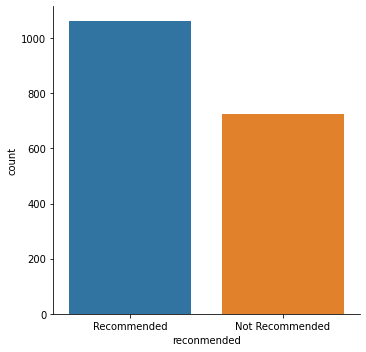

In [19]:
import seaborn as sns
sns.catplot(x='reconmended',kind='count',data = data)

#3 : Tiền xử lý dữ liệu

**Xử lý chuỗi**

In [20]:
import nltk
import re
import string
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
def clean_text_round1(text):
    #Make text lowercase, remove text in angle brackets ,square brackets,round brakets ,curly brackets,
    text = re.sub('\<.*?\>','',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\(.*?\)', '', text)
    text = re.sub('\{.*?\}', '', text)
    return text

In [22]:
def clean_text_round2(text):
  #remove punctuation and remove words containing numbers,remove emoji
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text=re.sub('[^a-zA-Z]',' ',text)
  return text

In [23]:
def clean_text_round3(review):
  # change word to normoal word
  review=review.lower()
  review = review.split()
  wn = WordNetLemmatizer()
  review = [wn.lemmatize(word,pos="v") for word in review if word not in stopwords.words("english")]
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if word not in stopwords.words("english")]
  review = " ".join(review)
  return review

In [24]:
text = data['content']

In [25]:
text=text.apply(clean_text_round1)

In [26]:
text=text.apply(clean_text_round2)

In [27]:
text=text.apply(clean_text_round3)

**CountVectorizer**

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv= cv.fit_transform(text)

In [29]:
X_cv.shape

(1788, 7879)

**Phân chia dữ liệu**

In [30]:
Y = data['reconmended']

In [31]:
from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv,Y_train,Y_test = train_test_split(X_cv,Y,train_size=0.8,random_state=0)

#4 : Huấn luyện mô hình

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_cv,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#5 : Đánh giá mô hình

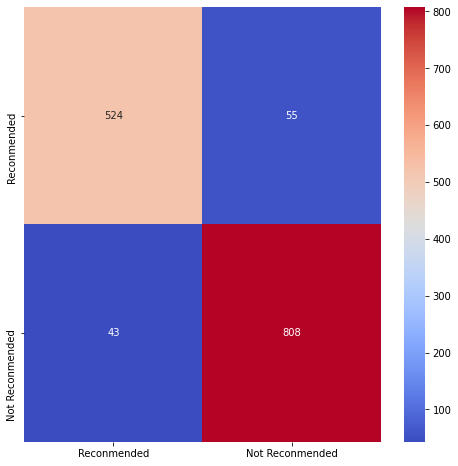

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
Y_train_pred = nb.predict(X_train_cv)
matrix = confusion_matrix(Y_train,Y_train_pred)
class_names =['Reconmended','Not Reconmended']
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(matrix, annot=True,xticklabels=class_names,yticklabels=class_names,ax = ax,fmt='g',cmap='coolwarm')
plt.show()

In [34]:
print(classification_report(Y_train,Y_train_pred))

                 precision    recall  f1-score   support

Not Recommended       0.92      0.91      0.91       579
    Recommended       0.94      0.95      0.94       851

       accuracy                           0.93      1430
      macro avg       0.93      0.93      0.93      1430
   weighted avg       0.93      0.93      0.93      1430



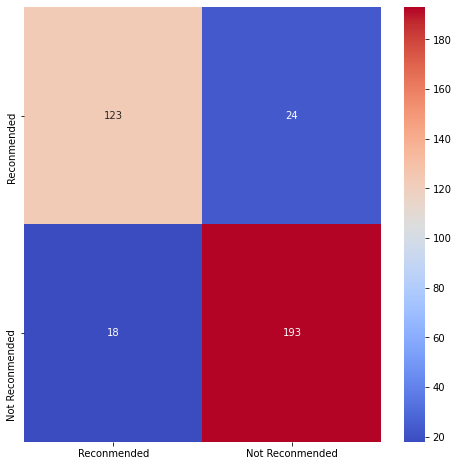

In [35]:
Y_pred = nb.predict(X_test_cv)
matrix = confusion_matrix(Y_test,Y_pred)
class_names =['Reconmended','Not Reconmended']
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(matrix, annot=True,xticklabels=class_names,yticklabels=class_names,ax = ax,fmt='g',cmap='coolwarm')
plt.show()

In [36]:
print(classification_report(Y_test,Y_pred))

                 precision    recall  f1-score   support

Not Recommended       0.87      0.84      0.85       147
    Recommended       0.89      0.91      0.90       211

       accuracy                           0.88       358
      macro avg       0.88      0.88      0.88       358
   weighted avg       0.88      0.88      0.88       358



In [39]:
print("Accuracy : ",nb.score(X_test_cv,Y_test))

Accuracy :  0.88268156424581


#6 : Lưu mô hình

In [38]:
import joblib
joblib.dump(nb,'model.h5')

['model.h5']